J'active la visualisation matplotlib


In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def ma_fonction(a,b,c):
    plt.figure(2) # ???
    x = np.linspace(-10,10, num=1000)
    plt.plot(x, a*x**2+b*x+c)
    plt.ylim(-10,10)
    plt.show()

In [4]:
interactive_plot = interactive(ma_fonction, a=(-10,10), b=(-20,20), c=(-5,5))
interactive_plot

interactive(children=(IntSlider(value=0, description='a', max=10, min=-10), IntSlider(value=0, description='b'…

Si il n'y a pas de sliders au dessus de la courbe, ne pas oublier de faire tourner la commande suivante `jupyter nbextension enable --py widgetsnbextension`

Je fait une autre fonction en seaborn en faisant varier le domaine aussi

In [5]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [6]:
# tentative moche d'exploration d'un data set, ça marche pas

def f(x):
    return x

interact(f, x=tips)

interactive(children=(Dropdown(description='x', options=('total_bill', 'tip', 'sex', 'smoker', 'day', 'time', …

<function __main__.f>

In [7]:
@interact(xmax=50,ymax=10, hue=["smoker","sex","day","time","size"], fun=[('Non',False),('Oui',True)])
def f(xmax,ymax,hue,fun):
    sns.set()
    sns.set(style="darkgrid")
    if(fun):
        ctx = plt.xkcd()
    else:
        from contextlib import nullcontext
        ctx = nullcontext()
    with ctx:
        plot = sns.relplot(x="total_bill", y="tip",  hue=hue, data=tips)
        plot.set(xlim=(0, xmax), ylim=(0, ymax))


interactive(children=(IntSlider(value=50, description='xmax', max=150, min=-50), IntSlider(value=10, descripti…

In [8]:
from bokeh.plotting import figure 
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.palettes import Category10_10 as palette
from bokeh.transform import factor_cmap

output_notebook()

@interact(color=["smoker","sex","day","time","size"])
def f(color):
    cds_df = ColumnDataSource(tips)
    p = figure(title="Tips repartition",
              x_axis_label="Total bill",
              y_axis_label="Tip")
    categories=[str(x) for x in tips[color].unique()]
    # Hack to fix bug with size being integer values
    tips['size']=[str(x) for x in tips['size']]
    colors = factor_cmap(color, palette=palette, factors=categories)
    p.circle(x='total_bill', y='tip', color=colors, legend=colors, source=cds_df)
    show(p)

Loading BokehJS ...

interactive(children=(Dropdown(description='color', options=('smoker', 'sex', 'day', 'time', 'size'), value='s…

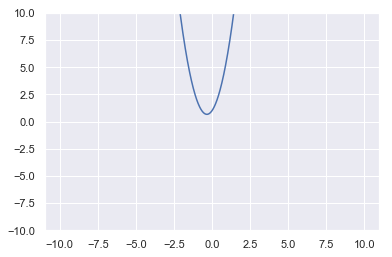

In [9]:
ma_fonction(3,2,1)

In [10]:
from ipywidgets import IntSlider
from ipywidgets.embed import embed_minimal_html

slider = IntSlider(value=40)

embed_minimal_html('plop.html', views=[slider], title='test')

error: bad escape \u at position 0